# Marcelo Villalba

# CS381 Data Analytics Final Project

### Due on 12/11/2019 23:59 pm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Dataset is based on an census income data
https://archive.ics.uci.edu/ml/datasets/census+income


Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. 


Attribute Information:

Listing of attributes:

* The last column >50K, <=50K is the target variable indicating whether the people earn less than or larger than 50K per year

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



### However, I have modified the dataset and so you will need to load the dataset by reading a csv file I provided. In particular, I changed 50K to 80K just to reflect the inflation 

In [4]:
df = pd.read_csv("adult_income2.csv")
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32565,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32566,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32567,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32568,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0
32569,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,1


### Your task is to build a model that can predict whether a people will earn <= 80K or > 80K

* Use any one of the models (Logistic, SVM, Decision Tree and Random Forecast) that we have covered in class.
* Do not use any models that we have not covered in class.
*
* The best performance model will have an extra 5 points, but the whole project will still be capped at 20 points for the whole final project
* The second and third performance model with have 2 extra points capped at 20 points for the whole final project.




### Make sure your work include the following steps

* EDA (chekcing missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least two models and checked their model performance
* performed cross-validations


First change the target variable salary to 0 and 1.  

# ^ Already done in excel before reading the csv file with jupyter notebook.

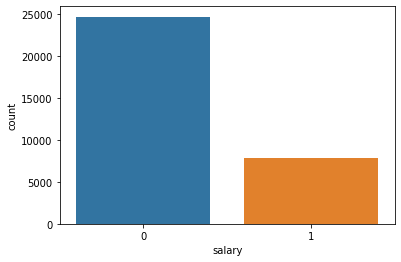

In [5]:
sns.countplot(df['salary'])

### Good Luck !!!

Show all your work below

# EDA

## First we check for null values 

In [6]:
df.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
salary            False
dtype: bool

In [7]:
## There are no null values

In [8]:
# we check for outliers in numerical columns

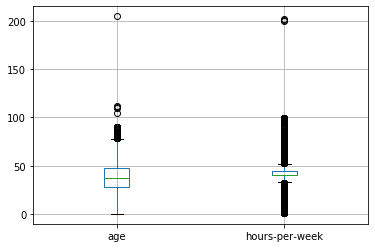

In [9]:
df.boxplot(column=['age', 'hours-per-week'])

In [10]:
print(df.age.describe())

count    32570.000000
mean        38.592662
std         13.694998
min          0.000000
25%         28.000000
50%         37.000000
75%         48.000000
max        205.000000
Name: age, dtype: float64


In [117]:
df.loc[df.age > 90]

,age,workclass,fnlwgt,education,EducationNum,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,HoursPerWeek,native-country,salary
17604,110,State-gov,101475,Assoc-acdm,12,Widowed,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,0
17605,111,State-gov,101475,Assoc-acdm,12,Widowed,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,0
17606,112,State-gov,101475,Assoc-acdm,12,Widowed,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,0
32548,105,State-gov,252208,HS-grad,9,Separated,Adm-clerical,Own-child,White,Female,0,0,40,United-States,0


### The above shows people of age >90.  205 is deffinetly an outlier.  The rest, although on the extreme could be true. We will replace 205 with the mean age. 

In [12]:
df.loc[32549,"age"]= 38

In [13]:
print(df.age.describe())

count    32570.000000
mean        38.587535
std         13.663920
min          0.000000
25%         28.000000
50%         37.000000
75%         48.000000
max        112.000000
Name: age, dtype: float64


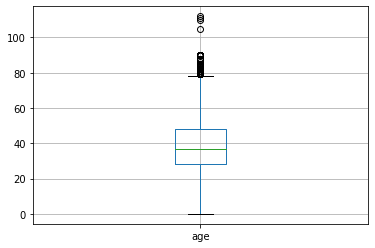

In [14]:
df.boxplot(column=['age'])

In [15]:
df.loc[df.age < 17]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
26,0,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,1


In [16]:
df.loc[26,"age"]= 38

In [17]:
print(df.age.describe())

count    32570.000000
mean        38.588701
std         13.662248
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max        112.000000
Name: age, dtype: float64


## on the lower extreme person with age of zero @ position was replaced with the mean age. The rest are 17 years or older, which is valid. 

In [18]:
##rename hours-per-week

In [19]:
df.rename(columns = {'hours-per-week': 'HoursPerWeek'}, inplace = True)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'HoursPerWeek', 'native-country',
       'salary'],
      dtype='object')

In [20]:
df.loc[df.HoursPerWeek > 133]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,HoursPerWeek,native-country,salary
17701,21,Private,540712,HS-grad,9,Never-married,Other-service,Other-relative,Black,Male,0,1719,200,United-States,0
17702,21,Private,540712,HS-grad,9,Never-married,Other-service,Other-relative,Black,Male,0,1719,201,United-States,0
17703,21,Private,540712,HS-grad,9,Never-married,Other-service,Other-relative,Black,Male,0,1719,202,United-States,0


In [21]:
## the above are outliers, replce with mean. 

In [22]:
print(df.HoursPerWeek.describe())

count    32570.000000
mean        40.452165
std         12.441520
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max        202.000000
Name: HoursPerWeek, dtype: float64


In [23]:
df.loc[17701,"HoursPerWeek"]= 40

In [24]:
df.loc[17702,"HoursPerWeek"]= 40

In [25]:
df.loc[17703,"HoursPerWeek"]= 40

In [26]:
df.loc[df.HoursPerWeek > 80]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,HoursPerWeek,native-country,salary
273,50,Self-emp-not-inc,30653,Masters,14,Married-civ-spouse,Farming-fishing,Husband,White,Male,2407,0,98,United-States,0
936,37,Private,176900,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,99,United-States,1
1173,25,Private,404616,Masters,14,Married-civ-spouse,Farming-fishing,Not-in-family,White,Male,0,0,99,United-States,1
1418,31,Private,179186,Bachelors,13,Married-civ-spouse,Sales,Husband,Black,Male,0,0,90,United-States,1
1731,24,Private,180060,Masters,14,Never-married,Exec-managerial,Own-child,White,Male,6849,0,90,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32398,55,Private,199763,HS-grad,9,Separated,Protective-serv,Not-in-family,White,Male,0,0,81,United-States,0
32409,42,Private,288154,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,89,United-States,1
32476,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,0
32483,35,Private,30673,12th,8,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,84,United-States,0


In [27]:
df.loc[df.HoursPerWeek < 10]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,HoursPerWeek,native-country,salary
78,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,0
158,71,Self-emp-not-inc,494223,Some-college,10,Separated,Sales,Unmarried,Black,Male,0,1816,2,United-States,0
190,58,State-gov,109567,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,1,United-States,1
347,67,?,36135,11th,7,Married-civ-spouse,?,Husband,White,Male,0,0,8,United-States,0
388,44,Private,162028,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,2415,6,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32324,63,?,126540,Some-college,10,Divorced,?,Not-in-family,White,Female,0,0,5,United-States,0
32348,74,Self-emp-not-inc,199136,Bachelors,13,Widowed,Craft-repair,Not-in-family,White,Male,15831,0,8,Germany,1
32466,85,Private,98611,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,3,Poland,0
32501,82,?,403910,HS-grad,9,Never-married,?,Not-in-family,White,Male,0,0,3,United-States,0


In [28]:
## considering the eldery age of these poeople it is likely for them to work less than 10 hours a day.

## We will now see if we can determine some relationships between our columns.

In [29]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,HoursPerWeek,salary
age,1.000000,-0.077186,0.036812,0.077464,0.057013,0.068618,0.233317
fnlwgt,-0.077186,1.000000,-0.043361,0.000392,-0.008992,-0.018768,-0.009592
education-num,0.036812,-0.043361,1.000000,0.122617,0.079684,0.148113,0.335164
capital-gain,0.077464,0.000392,0.122617,1.000000,-0.031640,0.078410,0.223321
capital-loss,0.057013,-0.008992,0.079684,-0.031640,1.000000,0.054203,0.150196
HoursPerWeek,0.068618,-0.018768,0.148113,0.078410,0.054203,1.000000,0.229672
salary,0.233317,-0.009592,0.335164,0.223321,0.150196,0.229672,1.000000


In [30]:
#Education-num has the highest collelation to salary. Followed by age and hours worked

In [31]:
## since educatoin-num has highest correlation lets check for outliers there.

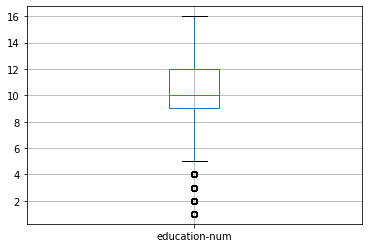

In [32]:
df.boxplot(column=['education-num'])

In [33]:
##lets rename the column education-num

In [34]:
df.rename(columns = {'education-num': 'EducationNum'}, inplace = True)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'EducationNum',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'HoursPerWeek', 'native-country',
       'salary'],
      dtype='object')

In [35]:
df.loc[df.EducationNum <=1]

,age,workclass,fnlwgt,education,EducationNum,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,HoursPerWeek,native-country,salary
225,53,Local-gov,140359,Preschool,1,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,35,United-States,0
933,51,Local-gov,241843,Preschool,1,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,0
2885,71,Private,235079,Preschool,1,Widowed,Craft-repair,Unmarried,Black,Male,0,0,10,United-States,0
2947,31,Private,452405,Preschool,1,Never-married,Other-service,Other-relative,White,Female,0,0,35,Mexico,0
3447,33,Private,239781,Preschool,1,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,Mexico,0
3593,39,?,362685,Preschool,1,Widowed,?,Not-in-family,White,Female,0,0,20,El-Salvador,0
4108,52,Private,416129,Preschool,1,Married-civ-spouse,Other-service,Not-in-family,White,Male,0,0,40,El-Salvador,0
6434,27,Private,211032,Preschool,1,Married-civ-spouse,Farming-fishing,Other-relative,White,Male,41310,0,24,Mexico,0
6865,54,Private,286989,Preschool,1,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,60,United-States,0
7071,30,Private,193598,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,Mexico,0


In [36]:
## althoug <1 years of education is extreme. There are 552 rows which in my opinoon is significant enought to not be
## outliers and makes sense with the relative data in education column. 

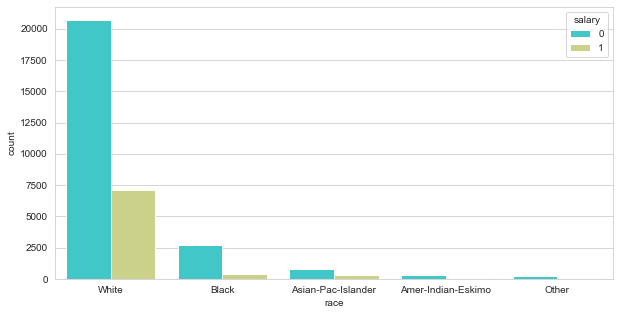

In [37]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.countplot(x='race',hue='salary',data=df,palette='rainbow')


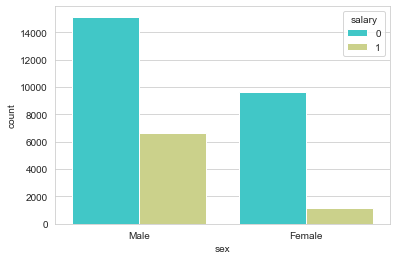

In [38]:
sns.countplot(x='sex',hue='salary',data=df,palette='rainbow')

### We can see the population for whites is much greater than the population for other races. But clearly the ratio within each race for >80k or not is.
### ratio of females that make more than 80k is small compared to males. 
# We will now create dummy variables for categorical values race and sex before building out model. 

In [39]:
categorical_features = ['race', 'sex']
for col in categorical_features:
    dummies = pd.get_dummies(df[col], prefix=col)
    newdf = pd.concat([df, dummies], axis=1)
newdf.head()

,age,workclass,fnlwgt,education,EducationNum,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,HoursPerWeek,native-country,salary,sex_Female,sex_Male
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,0,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,0,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,0,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,1,0


In [40]:
newdf = newdf.drop(["sex"], axis =1 )

In [41]:
newdf.head()

,age,workclass,fnlwgt,education,EducationNum,marital-status,occupation,relationship,race,capital-gain,capital-loss,HoursPerWeek,native-country,salary,sex_Female,sex_Male
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,0,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,0,0,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,0,0,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,0,0,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,0,1,0


In [42]:
race = pd.get_dummies(newdf['race'],drop_first = True)

In [43]:
race

,Asian-Pac-Islander,Black,Other,White
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
32565,0,0,0,1
32566,0,0,0,1
32567,0,0,0,1
32568,0,0,0,1


In [44]:
finaldf = pd.concat([newdf,race], axis =1)

In [45]:
finaldf = finaldf.drop(["race"], axis =1 )

In [46]:
## also decided to drop education since it is non-numerical and education Num is its equivalent

In [47]:
finaldf = finaldf.drop(["education"], axis =1 )

In [48]:
finaldf

,age,workclass,fnlwgt,EducationNum,marital-status,occupation,relationship,capital-gain,capital-loss,HoursPerWeek,native-country,salary,sex_Female,sex_Male,Asian-Pac-Islander,Black,Other,White
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,2174,0,40,United-States,0,0,1,0,0,0,1
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,0,0,13,United-States,0,0,1,0,0,0,1
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,0,0,40,United-States,0,0,1,0,0,0,1
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,0,0,40,United-States,0,0,1,0,1,0,0
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,0,0,40,Cuba,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32565,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,0,0,38,United-States,0,1,0,0,0,0,1
32566,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,0,0,40,United-States,1,0,1,0,0,0,1
32567,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,0,0,40,United-States,0,1,0,0,0,0,1
32568,22,Private,201490,9,Never-married,Adm-clerical,Own-child,0,0,20,United-States,0,0,1,0,0,0,1


In [49]:
## We still have many non numerical features that may prove to be beneficial if removed. Will come back to this. 

## NOW We sample out data into training and testing sets for our models.   


In [50]:
train_df = finaldf.sample(int(finaldf.shape[0] * 0.8))
print(train_df.shape)
train_df.head()

(26056, 18)


,age,workclass,fnlwgt,EducationNum,marital-status,occupation,relationship,capital-gain,capital-loss,HoursPerWeek,native-country,salary,sex_Female,sex_Male,Asian-Pac-Islander,Black,Other,White
27793,41,Private,407425,8,Divorced,Machine-op-inspct,Not-in-family,0,0,40,United-States,0,1,0,0,1,0,0
3457,22,?,113175,10,Never-married,?,Own-child,0,0,20,United-States,0,1,0,0,0,0,1
15039,19,Private,206599,10,Never-married,Adm-clerical,Own-child,0,0,16,United-States,0,1,0,0,0,0,1
9948,25,Private,362826,9,Never-married,Handlers-cleaners,Other-relative,0,0,45,United-States,0,0,1,0,0,0,1
19382,44,Private,29762,9,Divorced,Transport-moving,Not-in-family,0,0,68,United-States,0,0,1,0,0,0,1


In [51]:
testing_rows = [idx for idx in finaldf.index if idx not in train_df.index]
len(testing_rows)

6514

In [52]:
test_df = finaldf.iloc[testing_rows, :]
print(test_df.shape)
test_df.head()

(6514, 18)


,age,workclass,fnlwgt,EducationNum,marital-status,occupation,relationship,capital-gain,capital-loss,HoursPerWeek,native-country,salary,sex_Female,sex_Male,Asian-Pac-Islander,Black,Other,White
5,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,0,0,40,United-States,0,1,0,0,0,0,1
6,49,Private,160187,5,Married-spouse-absent,Other-service,Not-in-family,0,0,16,Jamaica,0,1,0,0,1,0,0
20,40,Private,193524,16,Married-civ-spouse,Prof-specialty,Husband,0,0,60,United-States,1,0,1,0,0,0,1
21,54,Private,302146,9,Separated,Other-service,Unmarried,0,0,20,United-States,0,1,0,0,1,0,0
22,35,Federal-gov,76845,5,Married-civ-spouse,Farming-fishing,Husband,0,0,40,United-States,0,0,1,0,1,0,0


In [53]:
train = train_df.drop(['workclass','marital-status','relationship', 'occupation', 'native-country'], axis =1)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('salary',axis=1), 
                                                    train['salary'], test_size=0.20, 
                                                    random_state=101)

## LOGISTIC REGRESSION MODEL

In [55]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
predictions = model.predict(X_test)

In [57]:
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      3949
           1       0.71      0.28      0.40      1263

    accuracy                           0.80      5212
   macro avg       0.76      0.62      0.64      5212
weighted avg       0.78      0.80      0.76      5212

0.7985418265541059


### This is the logfisctic regression model preformance. It is not too bad. I believe that if we add countries as
###a feature for the model, we could imporve the score for logistic regression. Lets see.
# BUT IT WILL ADD A LOT OF FEATURES, lets see if model performance improves by a lot or not. 

In [58]:
countries = pd.get_dummies(['native-country'],drop_first = True)
countries

""
0


## TRIAL two

In [59]:
finaldf2 = pd.concat([finaldf,countries], axis =1)

In [60]:
finaldf2

,age,workclass,fnlwgt,EducationNum,marital-status,occupation,relationship,capital-gain,capital-loss,HoursPerWeek,native-country,salary,sex_Female,sex_Male,Asian-Pac-Islander,Black,Other,White
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,2174,0,40,United-States,0,0,1,0,0,0,1
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,0,0,13,United-States,0,0,1,0,0,0,1
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,0,0,40,United-States,0,0,1,0,0,0,1
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,0,0,40,United-States,0,0,1,0,1,0,0
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,0,0,40,Cuba,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32565,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,0,0,38,United-States,0,1,0,0,0,0,1
32566,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,0,0,40,United-States,1,0,1,0,0,0,1
32567,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,0,0,40,United-States,0,1,0,0,0,0,1
32568,22,Private,201490,9,Never-married,Adm-clerical,Own-child,0,0,20,United-States,0,0,1,0,0,0,1


In [61]:
finaldf2 = finaldf2.drop(['workclass', 'marital-status','occupation', 'relationship', 'native-country' ], axis=1)

In [62]:
## now we converted features to numerical dummmies and we redo logistic regresion using the above sample, eplitting the data etc.


In [63]:
train_dfCountries = finaldf2.sample(int(finaldf2.shape[0] * 0.8))
print(train_dfCountries.shape)
train_dfCountries.head()

(26056, 13)


,age,fnlwgt,EducationNum,capital-gain,capital-loss,HoursPerWeek,salary,sex_Female,sex_Male,Asian-Pac-Islander,Black,Other,White
26326,46,175625,15,0,0,40,0,1,0,0,0,0,1
10089,50,136836,9,0,0,40,0,1,0,0,1,0,0
5383,26,205428,10,0,0,45,0,0,1,0,0,0,1
4016,28,356555,10,0,0,48,0,0,1,0,0,0,1
13349,34,226443,10,0,0,40,1,0,1,0,0,0,1


In [64]:
testing_rowsCountries = [idx for idx in finaldf2.index if idx not in train_dfCountries.index]
len(testing_rowsCountries)

6514

In [65]:
test_dfCountries = finaldf2.iloc[testing_rowsCountries, :]
print(test_dfCountries.shape)
test_dfCountries.head()

(6514, 13)


,age,fnlwgt,EducationNum,capital-gain,capital-loss,HoursPerWeek,salary,sex_Female,sex_Male,Asian-Pac-Islander,Black,Other,White
1,50,83311,13,0,0,13,0,0,1,0,0,0,1
16,25,176756,9,0,0,35,0,0,1,0,0,0,1
17,32,186824,9,0,0,40,0,0,1,0,0,0,1
19,43,292175,14,0,0,45,1,1,0,0,0,0,1
22,35,76845,5,0,0,40,0,0,1,0,1,0,0


In [66]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(train_dfCountries.drop('salary',axis=1), 
                                                    train_dfCountries['salary'], test_size=0.20, 
                                                    random_state=101)

In [67]:
model2 = LogisticRegression()
model2.fit(X_train2,y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
predictions2 = model2.predict(X_test2)

In [69]:
print(classification_report(y_test2,predictions2))
print(accuracy_score(y_test2, predictions2))

              precision    recall  f1-score   support

           0       0.81      0.97      0.89      4005
           1       0.74      0.27      0.39      1207

    accuracy                           0.81      5212
   macro avg       0.78      0.62      0.64      5212
weighted avg       0.80      0.81      0.77      5212

0.8085188027628549


# By adding more features(Countries) my model performance actually decresed. Although not by much. Concludion the first model of logistic regression type was better 

# Now I will use attempt to use a decision tree

In [70]:
treeData = finaldf.drop(['workclass','marital-status','occupation','relationship','native-country'], axis =1)

In [71]:
treeData

,age,fnlwgt,EducationNum,capital-gain,capital-loss,HoursPerWeek,salary,sex_Female,sex_Male,Asian-Pac-Islander,Black,Other,White
0,39,77516,13,2174,0,40,0,0,1,0,0,0,1
1,50,83311,13,0,0,13,0,0,1,0,0,0,1
2,38,215646,9,0,0,40,0,0,1,0,0,0,1
3,53,234721,7,0,0,40,0,0,1,0,1,0,0
4,28,338409,13,0,0,40,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32565,27,257302,12,0,0,38,0,1,0,0,0,0,1
32566,40,154374,9,0,0,40,1,0,1,0,0,0,1
32567,58,151910,9,0,0,40,0,1,0,0,0,0,1
32568,22,201490,9,0,0,20,0,0,1,0,0,0,1


In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X = treeData.drop('salary',axis=1)
y = treeData['salary']

In [74]:
X.head()

,age,fnlwgt,EducationNum,capital-gain,capital-loss,HoursPerWeek,sex_Female,sex_Male,Asian-Pac-Islander,Black,Other,White
0,39,77516,13,2174,0,40,0,1,0,0,0,1
1,50,83311,13,0,0,13,0,1,0,0,0,1
2,38,215646,9,0,0,40,0,1,0,0,0,1
3,53,234721,7,0,0,40,0,1,0,1,0,0
4,28,338409,13,0,0,40,1,0,0,1,0,0


In [75]:
X_trainT, X_testT, y_trainT, y_testT = train_test_split(X, y, test_size=0.30)

In [114]:
from sklearn.tree import DecisionTreeClassifier
modelTree = DecisionTreeClassifier(max_depth=8)
modelTree.fit(X_trainT,y_trainT)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [115]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
predictionsTree = modelTree.predict(X_testT)
print(confusion_matrix(y_testT,predictionsTree))
print(classification_report(y_testT,predictionsTree))
print(accuracy_score(y_testT, predictionsTree))

[[6993  441]
 [1173 1164]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      7434
           1       0.73      0.50      0.59      2337

    accuracy                           0.83      9771
   macro avg       0.79      0.72      0.74      9771
weighted avg       0.82      0.83      0.82      9771

0.8348173165489714


# Great model performance For decision Tree with the given features!
# Decistion Treee was the best performing model when compared with logistic regression